In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [25]:
df = pd.read_csv('PPG_Dataset.csv')

## Exploratory Data Analysis

In [4]:
print('First 5 rows of the dataset:')
df.head()

First 5 rows of the dataset:


,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label
0,-0.015552,0.016963,0.013575,0.027204,0.068154,0.129259,0.127915,0.345174,0.197811,0.167651,...,-0.426464,-0.346976,-0.132168,-0.252098,-0.241969,-0.134235,-0.091327,-0.081713,-0.057693,MI
1,0.002323,0.002754,0.022539,0.228807,0.107751,0.034439,0.086007,0.155667,0.163327,0.223759,...,-0.169345,-0.356808,-0.338996,-0.292489,-0.152872,-0.156076,-0.103265,-0.041579,-0.044272,MI
2,0.050481,-0.339781,0.265111,0.045092,0.040086,0.087173,0.092814,0.099586,-0.143305,0.164186,...,-0.401426,-0.402333,-0.373426,-0.303710,0.008599,-0.180633,-0.143135,-0.084758,0.060668,MI
3,0.023882,0.016561,0.248547,0.054567,0.128032,0.085954,0.107359,0.207137,0.174547,-0.100118,...,-0.390700,-0.353882,-0.294014,-0.267005,-0.242258,-0.186946,-0.173718,0.101331,0.063555,MI
4,-0.058591,0.171551,0.057262,0.270869,0.138357,0.078509,0.062504,0.104447,0.134795,0.194248,...,-0.391598,-0.334490,-0.326873,-0.249881,-0.210052,-0.194763,-0.415365,0.015432,0.010321,MI


In [5]:
# Get dimensions
rows, columns = df.shape

# Print results
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

# Alternative detailed view
print("\nDetailed Dataset Info:")
print(df.info())
df.describe()

Number of rows: 2576
Number of columns: 2001

Detailed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 2001 entries, 0 to Label
dtypes: float64(2000), object(1)
memory usage: 39.3+ MB
None


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,...,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000
mean,-0.005708,0.017970,0.033201,0.056708,0.071832,0.089736,0.110175,0.130679,0.148245,0.163338,...,-0.353296,-0.325031,-0.287979,-0.250430,-0.212872,-0.172467,-0.130904,-0.090724,-0.045809,-0.004907
std,0.065861,0.061506,0.064567,0.060762,0.059521,0.065979,0.059234,0.061158,0.061926,0.061638,...,0.121028,0.119636,0.110781,0.101694,0.098563,0.089035,0.074426,0.071760,0.064757,0.065110
min,-0.376140,-0.342394,-0.328278,-0.330451,-0.291035,-0.279629,-0.229686,-0.231586,-0.224004,-0.198668,...,-0.836645,-0.777268,-0.748191,-0.713903,-0.642188,-0.630978,-0.523685,-0.489191,-0.436499,-0.384475
25%,-0.018485,0.002392,0.019900,0.040955,0.058416,0.075981,0.095981,0.114725,0.132857,0.149877,...,-0.457881,-0.419973,-0.376735,-0.329924,-0.280222,-0.225298,-0.172863,-0.118387,-0.061463,-0.017480
50%,-0.001078,0.020138,0.037462,0.058067,0.075507,0.093184,0.113060,0.131897,0.149928,0.167474,...,-0.280993,-0.256443,-0.226706,-0.199879,-0.171214,-0.143668,-0.113097,-0.078792,-0.039714,-0.001028
75%,0.016457,0.037312,0.053817,0.073802,0.091474,0.110968,0.130357,0.149249,0.166125,0.184307,...,-0.248326,-0.223195,-0.195184,-0.167371,-0.138041,-0.110256,-0.083802,-0.053427,-0.021310,0.016677
max,0.274361,0.293040,0.302497,0.345651,0.351911,0.376147,0.409745,0.403988,0.422486,0.445640,...,-0.178149,-0.161479,-0.106956,-0.040345,0.017529,0.044643,0.092616,0.141401,0.215511,0.263300


In [6]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       'Label'],
      dtype='object', length=2001)

In [7]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
1996     float64
1997     float64
1998     float64
1999     float64
Label     object
Length: 2001, dtype: object

In [8]:
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
1996     0
1997     0
1998     0
1999     0
Label    0
Length: 2001, dtype: int64

In [9]:
df.loc[df.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label


In [10]:
df.Label.value_counts()

Label
MI        1294
Normal    1282
Name: count, dtype: int64

MI :  0.5023291925465838
Normal:  0.49767080745341613


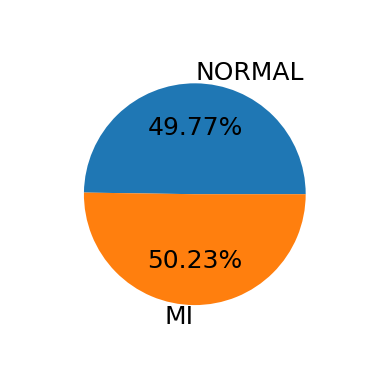

In [11]:
NORMAL = 1282 / 2576
MI = 1294 / 2576
print("MI : ", MI)
print("Normal: ", NORMAL)
data = [NORMAL, MI]
keys = ['NORMAL', 'MI']
plt.pie(data, labels = keys, radius = 0.75, 
        autopct = '%1.2f%%', textprops = { 'fontsize' : 18})
plt.show()

In [23]:
# Specify the row index
row_index = 2576

# Extract the signal (all columns for the specified row)
signal = ppg_features[row_index]  # Direct indexing for lists

# Generate a time vector based on the number of columns
time_points = range(len(signal))

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(time_points, signal, label=f'Signal at Row {row_index}')
plt.title('Signal Plot')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

IndexError: list index out of range